In [3]:
import json
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import datetime
from dateutil.relativedelta import relativedelta

plt.style.use('ggplot')

today=datetime.date.today()
start=(today - relativedelta(years=1)).isoformat()
end=today.isoformat()

url="https://api.coindesk.com/v1/bpi/historical/close.json?start={}&end={}".format(start,end)
print(url)
df = pd.DataFrame(list(requests.get(url).json()['bpi'].items()), columns=['Date', 'Price(USD)'])
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.tail()

https://api.coindesk.com/v1/bpi/historical/close.json?start=2017-03-06&end=2018-03-06


,Date,Price(USD)
360,2018-03-01,10907.5900
361,2018-03-02,11019.5213
362,2018-03-03,11438.6513
363,2018-03-04,11479.7313
364,2018-03-05,11432.9825


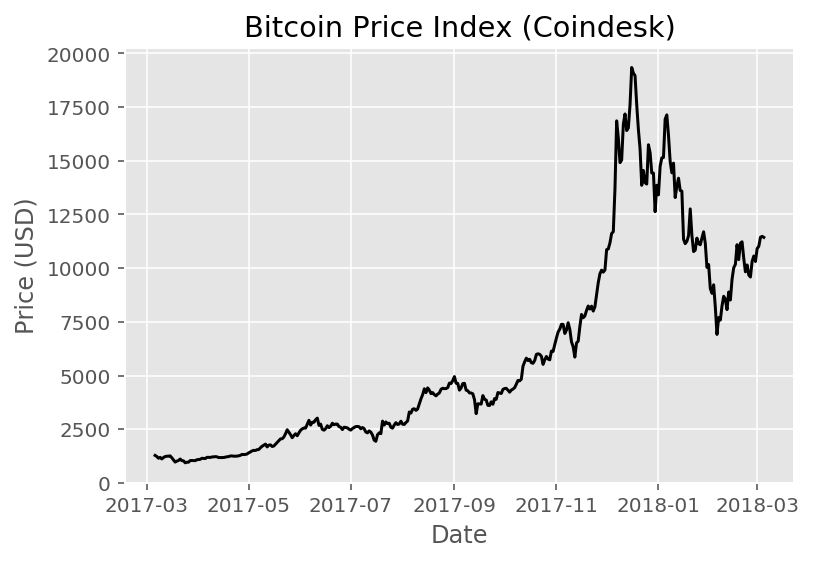

In [5]:
#%config InlineBackend.figure_formats = {'png', 'retina'}
#%config InlineBackend.figure_format = 'retina'
#fig = plt.figure(figsize=(14,6))
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df['Date'], df['Price(USD)'], label="Bitcoin", color="black")

ax.set_title('Bitcoin Price Index (Coindesk)')
ax.set_ylabel('Price (USD)')
ax.set_xlabel('Date')

plt.show()